# Project title: Predicting COPD Exacerbations

## Problem Statement
COPD is a chronic respiratory disease affecting middle-aged and older adults. It is characterized by progressive airflow limitation and respiratory symptoms. COPD exacerbations are acute events in the course of the disease that lead to worsened respiratory symptoms, increased healthcare utilization, reduced quality of life, and mortality. Identifying individuals at higher risk of COPD exacerbations is crucial for implementing timely interventions to improve their outcomes and reduce the healthcare burden. This project aims to develop a predictive model for COPD exacerbations.

## Dataset

The dataset selected for this ISP is sourced from a public open-access repository. This dataset can be found at this link: https://zenodo.org/records/6400146. It includes anonymized patient data such as demographic information, body composition measurements, lifestyle and clinical characteristics, medication use, lung function tests, various comorbidities, and exacerbation status of COPD patients. The dataset was chosen for its comprehensive nature and relevance to the COPD exacerbations study, enabling thorough analysis and model development.

## Variables

* sex - Women & Men
* age_cat2 - Age in three categories (40-59.9, 60-69.9 and 70+)
* bodycomp - (Normal, Cachetic, and Obese) body composition was assessed with bioelectrical impedance measurements using a Bodystat 1500 to calculate fat mass index (FMI) and fat-free mass index (FFMI). Cachexia was defined as having a FFMI < 14 kg/m2 in women and < 17 kg/m2 in men, which corresponds to the lower 95% CI in a normal population (19). Similarly, obesity was defined as FMI > 13.5 kg/m2 in women and > 9.3 kg/m2 in men.
* smok_habits - defined as never, ex, or current (daily) smokers
* packyrs_10 - Pack years smoked (defined for ex and daily only) where 20 cigarettes/day for one year equals one pack year divided by ten for regression purposes where a coefficient then equals increased risk (OR) per 10 pack years smoked.
* diabetes - self-reported diabetic status (yes or No)
* statin - self-reported statin use (Yes or No)
* ARB_ACE_all - use of either AII blockers or angiotensin receptor blockers
* sign_CACS - having a calcium score > 100 = "yes", else is "no"
* cor_stenosis - ( Yes or No) having significant stenosis on CT angiography assessed by one of two experienced cardiology radiologists. Confirmed coronary stenosis was defined as presence of stenosis (lumen reduction > 50%)
* COPD_control - either COPD patient or control without lung disease
* gold - In COPD patients, either GOLD stage I/II or stage III/IV
* copd_exacerb_cat - ( Yes or No) having had a moderate or serious COPD exacerbation in the last 12 months or not. Serious = hospitalization, moderate = treatment with systemic antibiotics and/or steroids
* resp_failure - ( Yes or No) Having arterial blood gas oxygen tension (pO2) < 8 kPa = yes
* eosinophilic_COPD - ( Yes or No) Having blood eosinophilia defined as ≥0.3*10^9 cells/L = yes
* wholelung950 - % lung area of density < 950 Hounsfield units
* crp_cat - (Yes or No) C-reactive protein below 5 or 5 and above

In [1]:
# import important libraries for data manipulation and visualization
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading dataset
data= pd.read_csv("copd.csv")

In [3]:
# obtaining the first five observations or rows
data.head()

,sex,age_cat2,bodycomp,smok_habits,packyrs_10,diabetes,statin,ARB_ACE_all,sign_CACS,cor_stenosis,COPD_control,gold,copd_exacerb_cat,resp_failure,eosinophilic_COPD,wholelung950,crp_cat
0,Women,60-69.9,NaN,ex,3.200000,no,no,no,no,no,copd,I/II,no,no,no,0.048834,yes
1,Men,60-69.9,normal,ex,1.600000,no,no,no,no,no,copd,I/II,no,no,no,0.770213,no
2,Men,60-69.9,NaN,daily,1.800000,no,no,no,no,no,copd,I/II,no,no,no,0.293123,no
3,Men,70+,normal,daily,5.202053,no,no,no,no,no,copd,I/II,no,no,no,0.420742,no
4,Men,70+,normal,ex,2.800000,no,no,no,yes,NaN,copd,III/IV,no,no,no,4.093520,no


In [4]:
# obtaining the last five observations or rows
data.tail()

,sex,age_cat2,bodycomp,smok_habits,packyrs_10,diabetes,statin,ARB_ACE_all,sign_CACS,cor_stenosis,COPD_control,gold,copd_exacerb_cat,resp_failure,eosinophilic_COPD,wholelung950,crp_cat
342,Women,60-69.9,normal,ex,1.000000,no,no,no,yes,NaN,copd,III/IV,no,no,yes,0.029078,no
343,Women,60-69.9,obese,daily,2.405065,no,no,yes,no,no,copd,III/IV,no,no,no,2.912540,no
344,Men,70+,obese,ex,1.200000,no,no,no,yes,no,copd,I/II,no,no,no,1.125000,no
345,Men,70+,normal,daily,2.624675,no,yes,yes,NaN,no,copd,I/II,no,no,yes,0.538456,no
346,Men,60-69.9,cachectic,daily,4.031160,no,no,no,no,no,copd,III/IV,no,yes,no,13.009300,no


In [5]:
# structure or shape of the data
data.shape

(347, 17)

In [6]:
# detailed information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                347 non-null    object 
 1   age_cat2           347 non-null    object 
 2   bodycomp           328 non-null    object 
 3   smok_habits        347 non-null    object 
 4   packyrs_10         322 non-null    float64
 5   diabetes           346 non-null    object 
 6   statin             347 non-null    object 
 7   ARB_ACE_all        347 non-null    object 
 8   sign_CACS          333 non-null    object 
 9   cor_stenosis       254 non-null    object 
 10  COPD_control       347 non-null    object 
 11  gold               347 non-null    object 
 12  copd_exacerb_cat   344 non-null    object 
 13  resp_failure       340 non-null    object 
 14  eosinophilic_COPD  347 non-null    object 
 15  wholelung950       315 non-null    float64
 16  crp_cat            347 non

In [7]:
# missing value checks
data.isnull().sum()

sex                   0
age_cat2              0
bodycomp             19
smok_habits           0
packyrs_10           25
diabetes              1
statin                0
ARB_ACE_all           0
sign_CACS            14
cor_stenosis         93
COPD_control          0
gold                  0
copd_exacerb_cat      3
resp_failure          7
eosinophilic_COPD     0
wholelung950         32
crp_cat               0
dtype: int64

In [8]:
# initials checks for duplicates
data.duplicated().sum()

0

In [9]:
# Initial descriptive for numeric columns
data.describe(include= np.number).T

,count,mean,std,min,25%,50%,75%,max
packyrs_10,322.0,3.095039,1.834174,0.015000,1.751215,2.85000,4.100000,11.7000
wholelung950,315.0,6.350435,8.799983,0.012982,0.430837,2.46864,9.056284,40.7601


In [10]:
# Initial value counts of object variables

# Columns with object type 
data_object = data.select_dtypes(include=['object']).columns

# Loop through each object column and compute value counts
for col in data_object:
    value_counts = data[col].value_counts()
    print(f"Value counts for '{col}':")
    print(value_counts)
    print()

Value counts for 'sex':
sex
Men      188
Women    159
Name: count, dtype: int64

Value counts for 'age_cat2':
age_cat2
60-69.9    152
70+        151
40-59.9     44
Name: count, dtype: int64

Value counts for 'bodycomp':
bodycomp
normal       174
cachectic     89
obese         65
Name: count, dtype: int64

Value counts for 'smok_habits':
smok_habits
ex       238
daily    108
never      1
Name: count, dtype: int64

Value counts for 'diabetes':
diabetes
no     306
yes     40
Name: count, dtype: int64

Value counts for 'statin':
statin
no     236
yes    111
Name: count, dtype: int64

Value counts for 'ARB_ACE_all':
ARB_ACE_all
no     290
yes     57
Name: count, dtype: int64

Value counts for 'sign_CACS':
sign_CACS
yes    186
no     147
Name: count, dtype: int64

Value counts for 'cor_stenosis':
cor_stenosis
no     222
yes     32
Name: count, dtype: int64

Value counts for 'COPD_control':
COPD_control
copd    347
Name: count, dtype: int64

Value counts for 'gold':
gold
I/II      224
III/IV 

### making a copy of the data before EDA, data preprocessing and modelling

In [11]:
# copy of the data
df=data.copy()

In [12]:
# droping the copd_control column
df= df.drop('COPD_control', axis=1)

### EDA

#### Univariate EDA

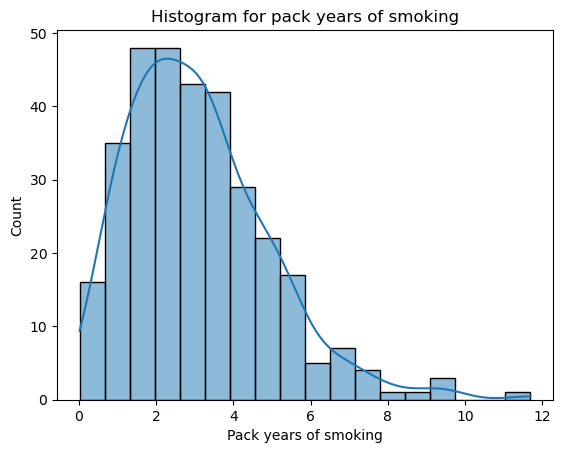

In [13]:
# histogram for pack years of smoking
sns.histplot(df, x='packyrs_10', kde=True)
plt.title('Histogram for pack years of smoking')
plt.xlabel('Pack years of smoking')
plt.show()

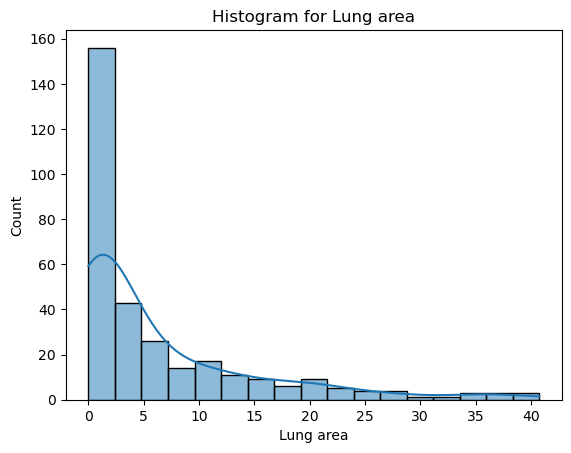

In [14]:
# histogram for lung area
sns.histplot(df, x='wholelung950', kde=True)
plt.title('Histogram for Lung area')
plt.xlabel('Lung area')
plt.show()

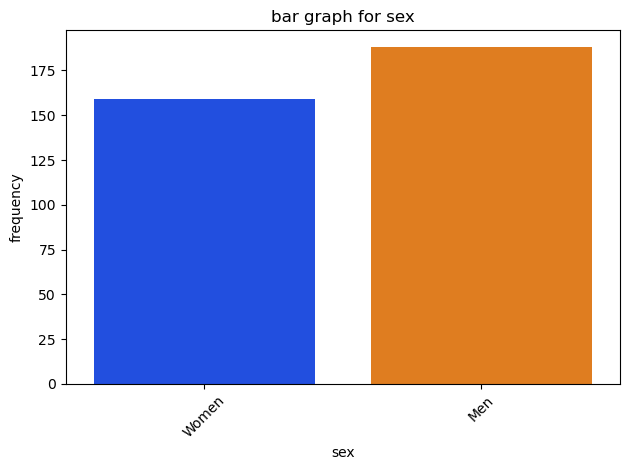

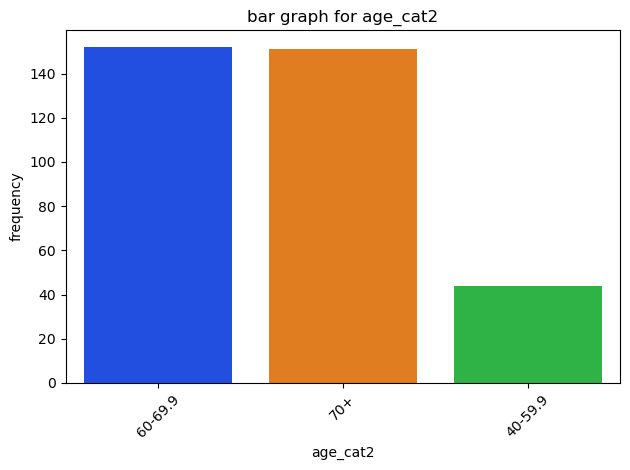

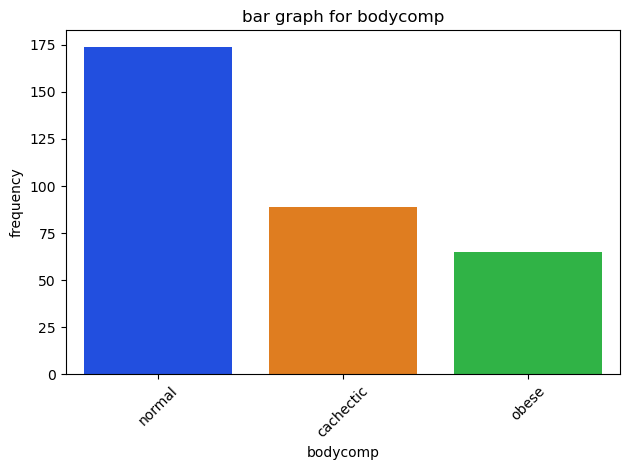

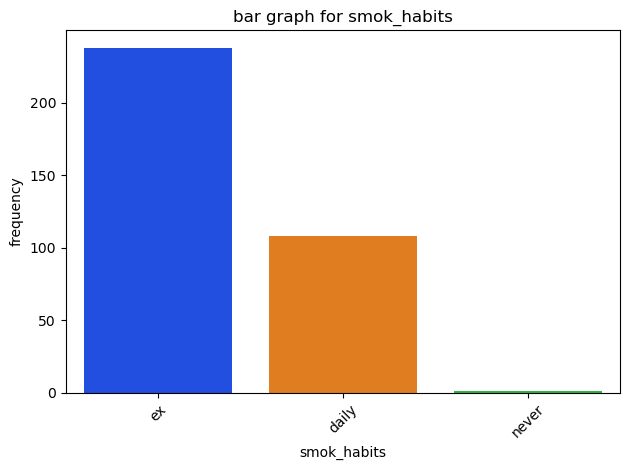

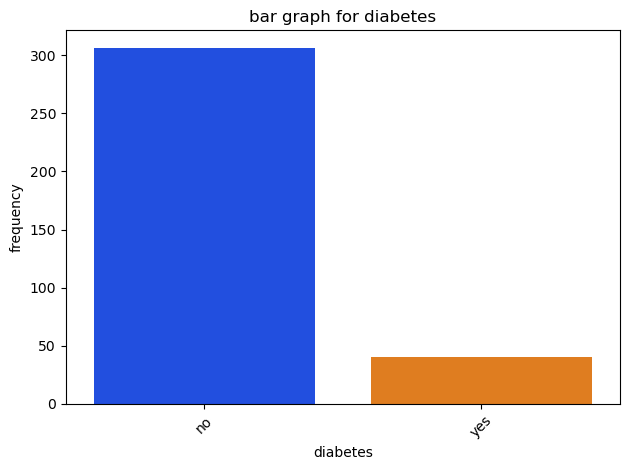

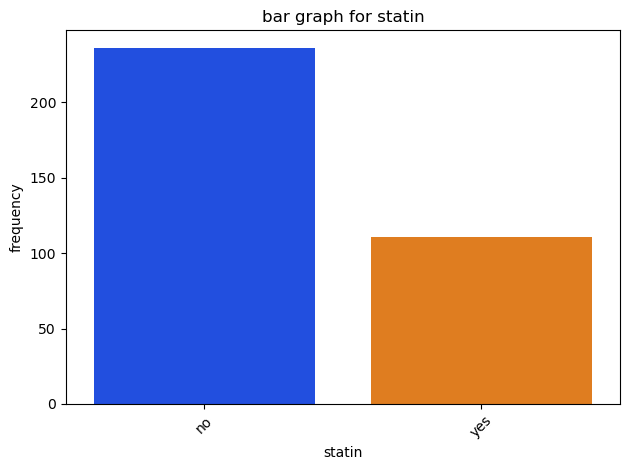

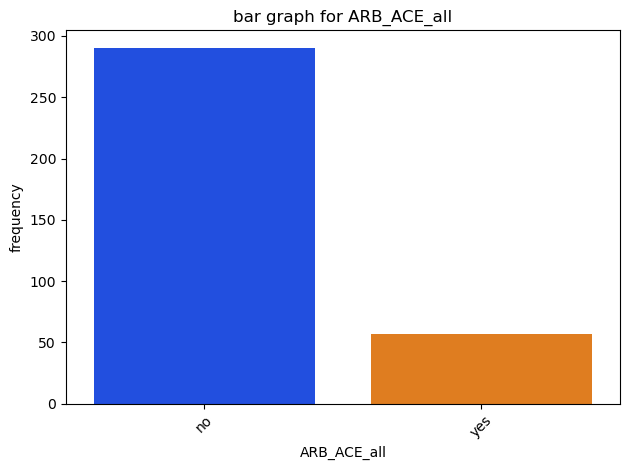

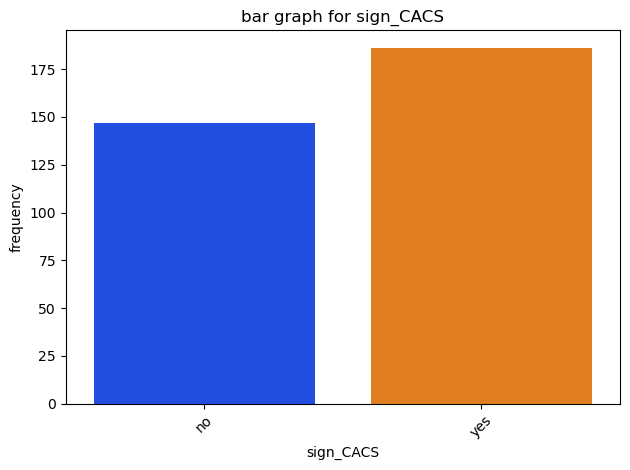

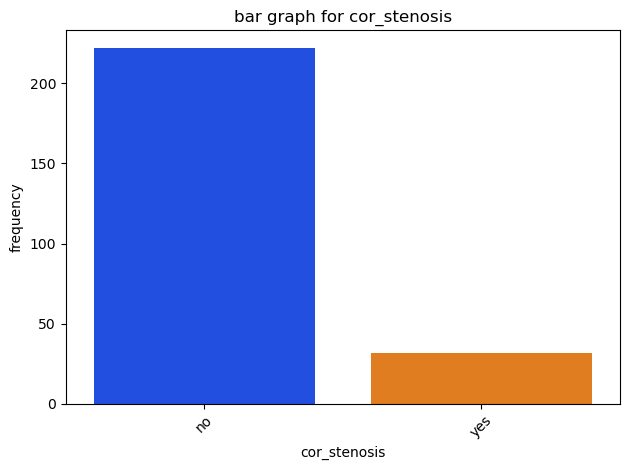

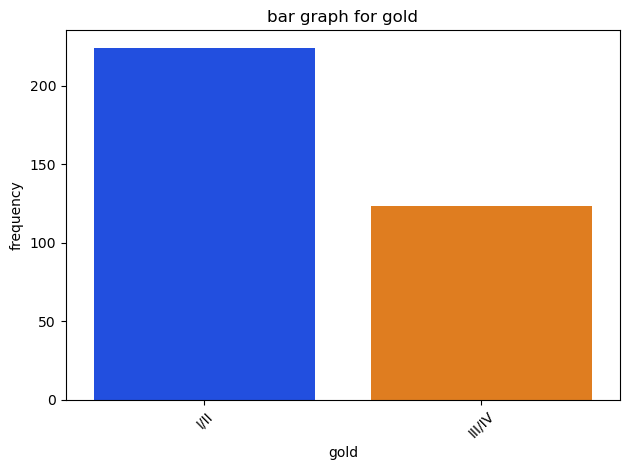

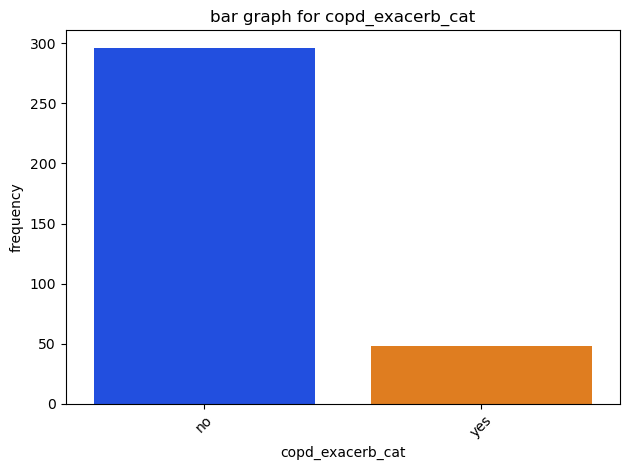

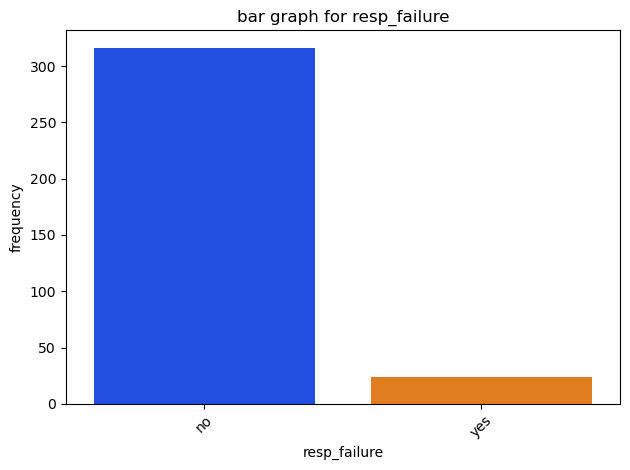

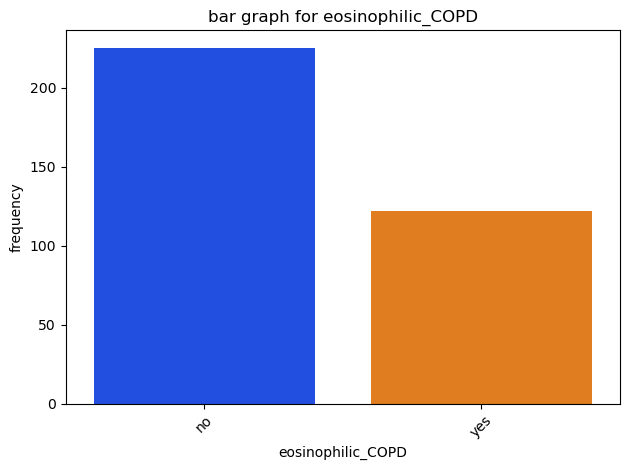

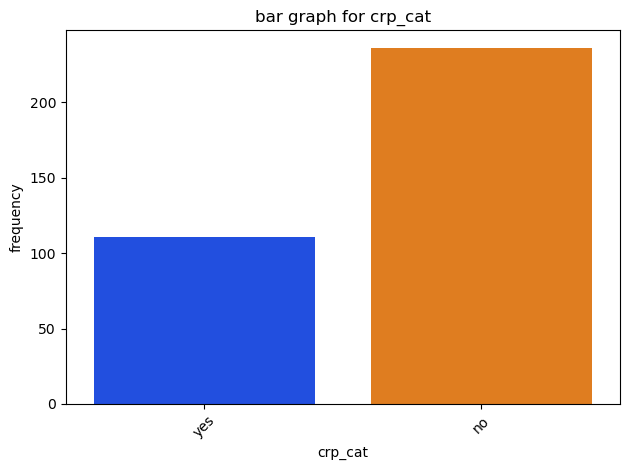

In [15]:
# Loop through each object column and plot bar graphs

data_object_copd = df.select_dtypes(include=['object']).columns

for col in data_object_copd:
    
    # Create a bar graph for each column
    sns.countplot(data=df, x=col, palette='bright')
    
    # Add labels and title
    plt.xlabel(col)
    plt.ylabel('frequency')
    plt.title(f'bar graph for {col}')
    
    # Rotate x-axis labels if necessary for better readability
    plt.xticks(rotation=45)
    
    # Show the plot
    plt.tight_layout()
    plt.show()

### Bivariate EDA

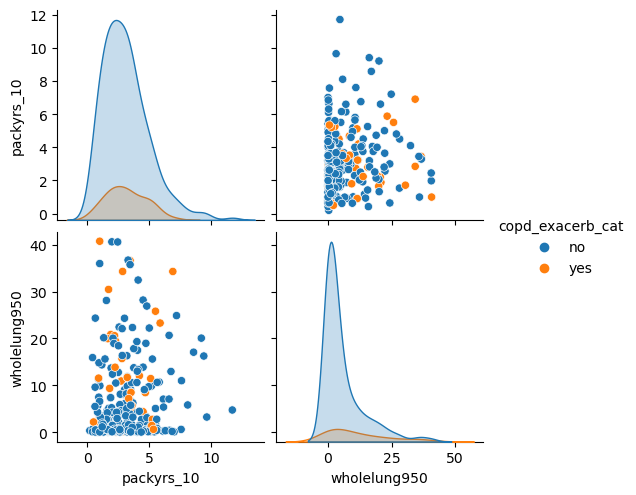

In [16]:
# pair plot of pack years of smoking and whole lung area
sns.pairplot(df, hue='copd_exacerb_cat', diag_kind= 'kde')
plt.show()

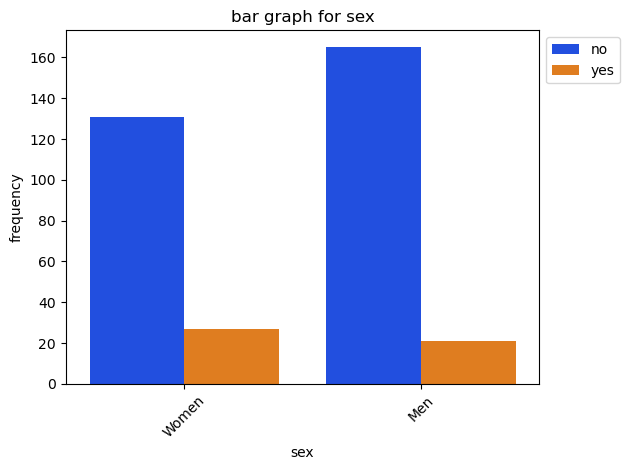

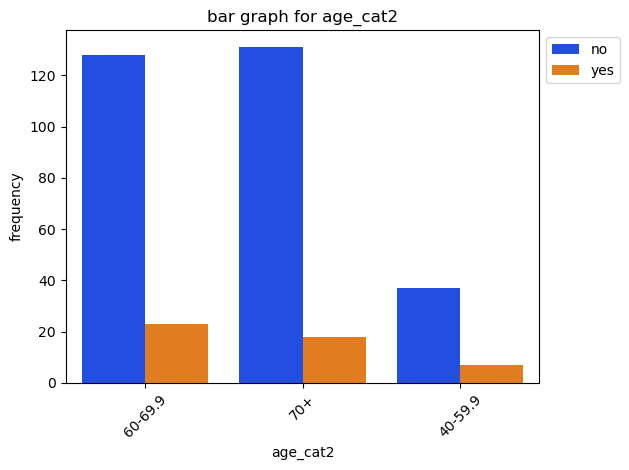

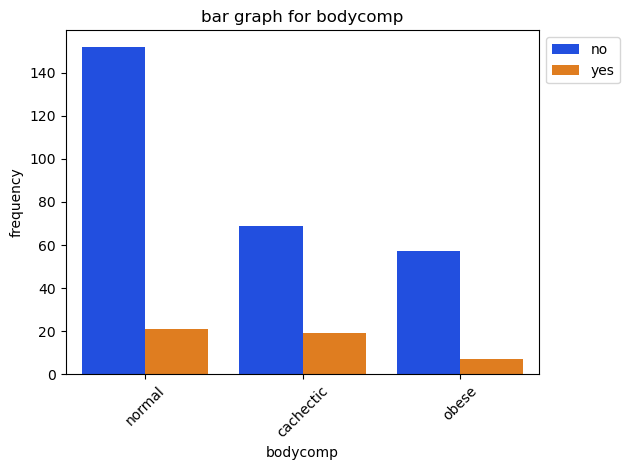

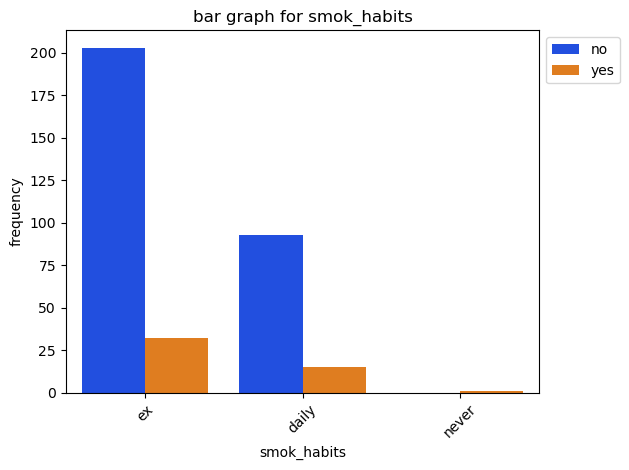

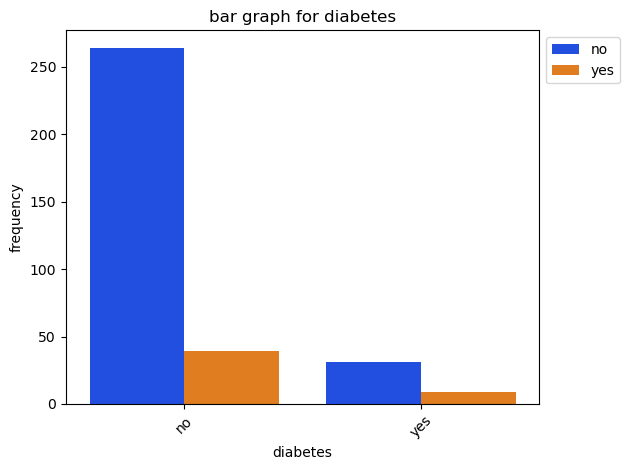

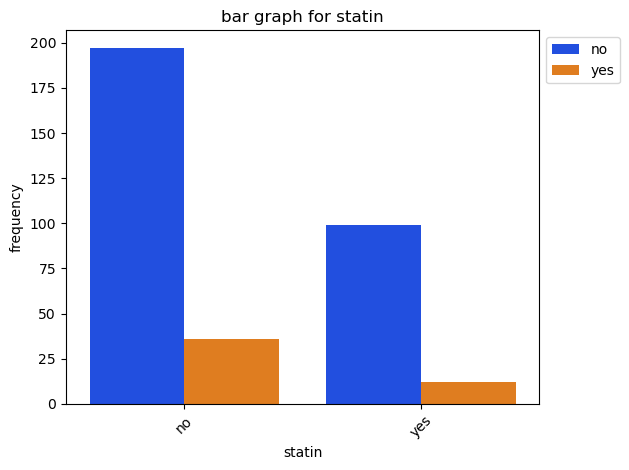

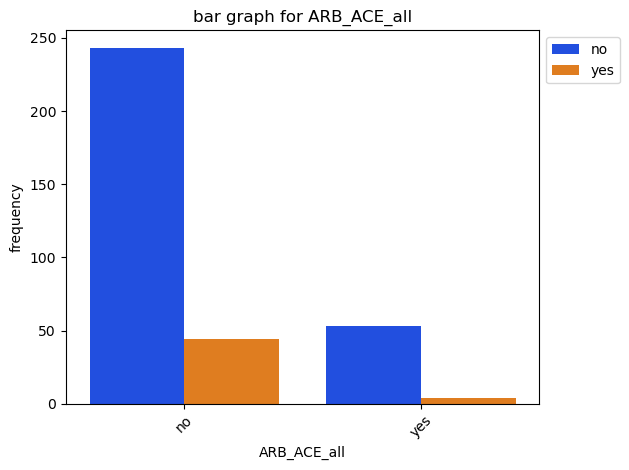

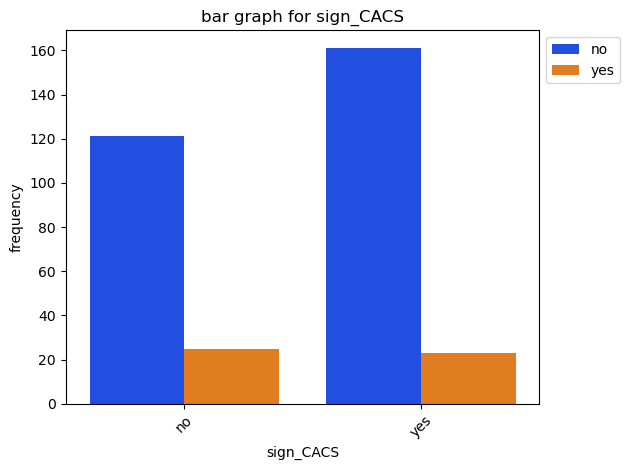

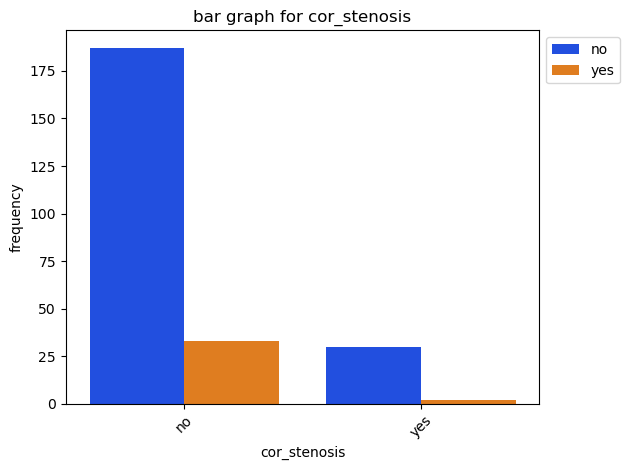

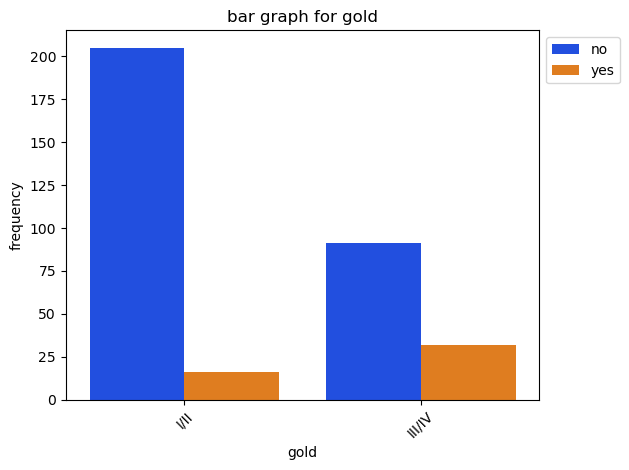

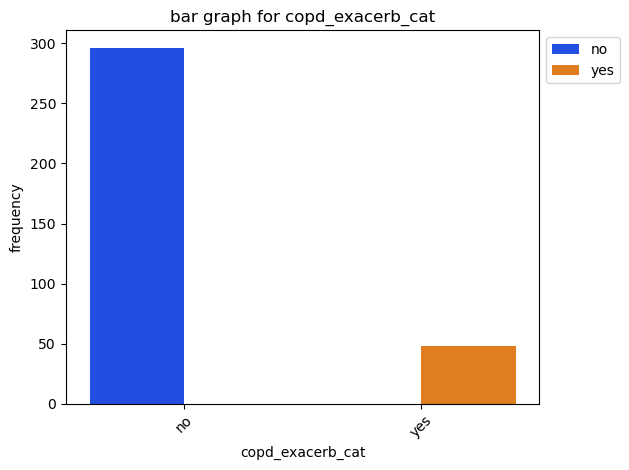

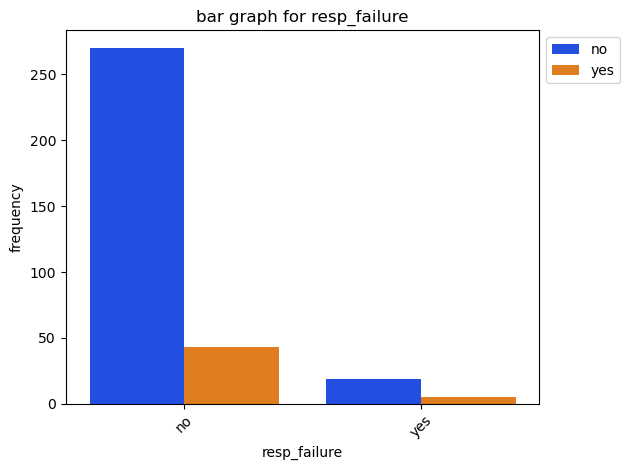

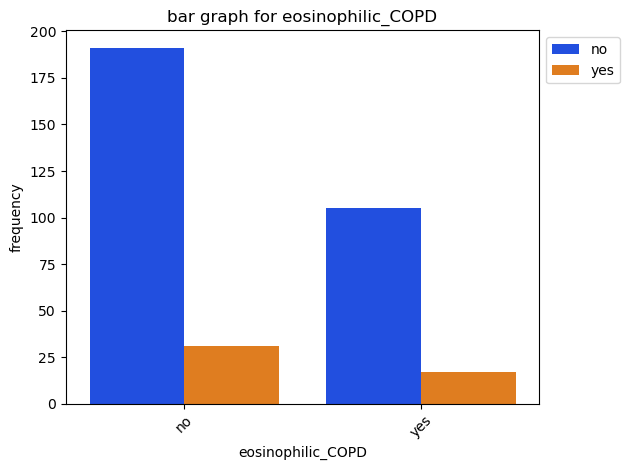

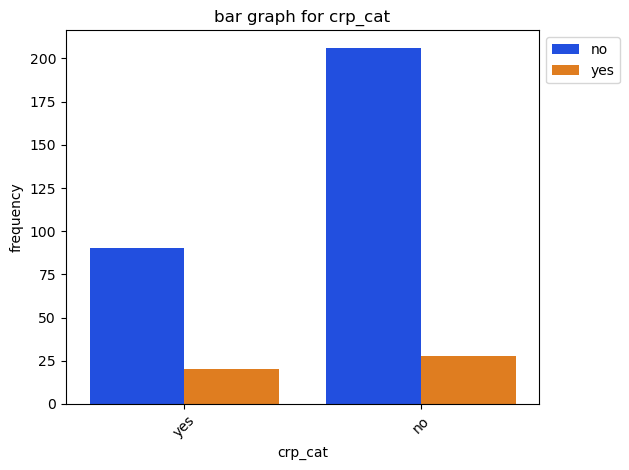

In [17]:
# Loop through each object column and plot bar graphs
for col in data_object_copd:
    
    # Create a bar graph for each column
    sns.countplot(x=col, data=df, hue= 'copd_exacerb_cat', palette='bright')
    
    # Add labels and title
    plt.xlabel(col)
    plt.ylabel('frequency')
    plt.title(f'bar graph for {col}')
    
    # Rotate x-axis labels if necessary for better readability
    plt.xticks(rotation=45)

     # Position the legend to the right
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
    # Show the plot
    plt.tight_layout()
    plt.show()

In [18]:
# assess NaNs

missing_counts = df.isnull().sum()
print(missing_counts)

# Calculate the total number of rows with at least one NaN value
total_rows_with_nan = df.isnull().any(axis=1).sum()
print(f'Total number of rows with at least one NaN value: {total_rows_with_nan}')


# calculate the percentage of NaNs in the dataset here:
total_missing_values = missing_counts.sum()
total_data_obs = df.size
total_percentage_missing = (total_missing_values / total_data_obs) * 100

print(f'Total percentage of NaN values in the dataset: {total_percentage_missing:.2f}%')

sex                   0
age_cat2              0
bodycomp             19
smok_habits           0
packyrs_10           25
diabetes              1
statin                0
ARB_ACE_all           0
sign_CACS            14
cor_stenosis         93
gold                  0
copd_exacerb_cat      3
resp_failure          7
eosinophilic_COPD     0
wholelung950         32
crp_cat               0
dtype: int64
Total number of rows with at least one NaN value: 161
Total percentage of NaN values in the dataset: 3.49%


## Dealing with missing values and data preprocessing

### Import relevant libraries

In [19]:
# importing important libraries for preprocessing data and model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import (classification_report, ConfusionMatrixDisplay, confusion_matrix, 
roc_auc_score, roc_curve, precision_score, precision_recall_curve, recall_score, accuracy_score, f1_score)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

In [20]:
# Handle missing values (example: fill NaNs with mode for categorical and median for numerical)
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].median(), inplace=True)

In [21]:
df.isnull().sum()

sex                  0
age_cat2             0
bodycomp             0
smok_habits          0
packyrs_10           0
diabetes             0
statin               0
ARB_ACE_all          0
sign_CACS            0
cor_stenosis         0
gold                 0
copd_exacerb_cat     0
resp_failure         0
eosinophilic_COPD    0
wholelung950         0
crp_cat              0
dtype: int64

In [22]:
df["sex"] = df["sex"].astype("category")
df["age_cat2"] = df["age_cat2"].astype("category")
df["bodycomp"] = df["bodycomp"].astype("category")
df["smok_habits"] = df["smok_habits"].astype("category")
df["diabetes"] = df["diabetes"].astype("category")
df["statin"] = df["statin"].astype("category")
df["ARB_ACE_all"] = df["ARB_ACE_all"].astype("category")
df["sign_CACS"] = df["sign_CACS"].astype("category")
df["cor_stenosis"] = df["cor_stenosis"].astype("category")
df["gold"] = df["gold"].astype("category")
df["copd_exacerb_cat"] = df["copd_exacerb_cat"].astype("category")
df["resp_failure"] = df["resp_failure"].astype("category")
df["eosinophilic_COPD"] = df["eosinophilic_COPD"].astype("category")
df["crp_cat"] = df["crp_cat"].astype("category")

In [23]:
df=pd.get_dummies(df, drop_first=True)

# Identify boolean columns
bool_columns = df.select_dtypes(include=['bool']).columns

# Convert boolean columns to integers
df[bool_columns] = df[bool_columns].astype(int)

# Print the resulting DataFrame
df.head()

,packyrs_10,wholelung950,sex_Women,age_cat2_60-69.9,age_cat2_70+,bodycomp_normal,bodycomp_obese,smok_habits_ex,smok_habits_never,diabetes_yes,statin_yes,ARB_ACE_all_yes,sign_CACS_yes,cor_stenosis_yes,gold_III/IV,copd_exacerb_cat_yes,resp_failure_yes,eosinophilic_COPD_yes,crp_cat_yes
0,3.200000,0.048834,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
1,1.600000,0.770213,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1.800000,0.293123,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5.202053,0.420742,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.800000,4.093520,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0


In [24]:
# Define features and target
X = df.drop('copd_exacerb_cat_yes', axis=1)
y = df['copd_exacerb_cat_yes']

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [26]:
# Standardize float features for X_train data
scaler = StandardScaler()
X_train[['packyrs_10', 'wholelung950']] = scaler.fit_transform(X_train[['packyrs_10', 'wholelung950']])

# standardize float variables for X_test data
X_test[['packyrs_10', 'wholelung950']] = scaler.fit_transform(X_test[['packyrs_10', 'wholelung950']])


### Logistic regression, Decision tree, and Random forest model of Original data

#### Logistic regression with original data

Logistic Regression on Original Data
              precision    recall  f1-score   support

           0       0.89      0.99      0.94        77
           1       0.50      0.10      0.17        10

    accuracy                           0.89        87
   macro avg       0.70      0.54      0.55        87
weighted avg       0.85      0.89      0.85        87



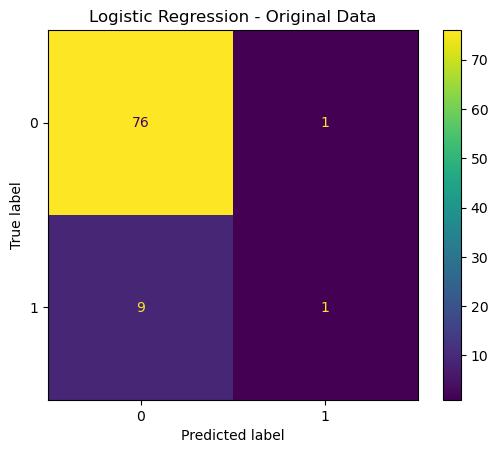

In [27]:
# Logistic Regression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = logreg.predict(X_test)

# Print classification report
print("Logistic Regression on Original Data")
print(classification_report(y_test, y_pred_logreg))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_logreg)
ConfusionMatrixDisplay(cm).plot()
plt.title("Logistic Regression - Original Data")
plt.show()

#### Decision Tree with original data

Decision Tree on Original Data
              precision    recall  f1-score   support

           0       0.90      0.74      0.81        77
           1       0.17      0.40      0.24        10

    accuracy                           0.70        87
   macro avg       0.54      0.57      0.52        87
weighted avg       0.82      0.70      0.75        87



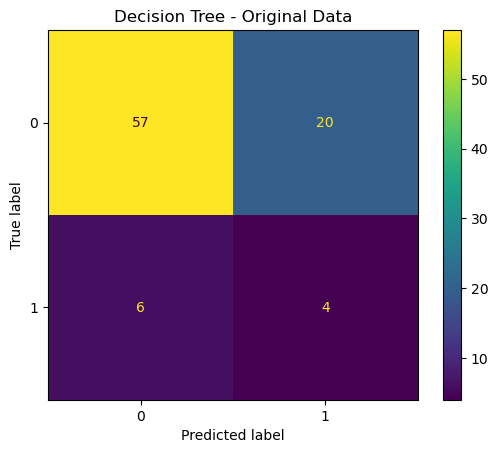

In [28]:

# Decision Tree
tree =  DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# Predict on the test set
y_pred_tree = tree.predict(X_test)

# Print classification report
print("Decision Tree on Original Data")
print(classification_report(y_test, y_pred_tree))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_tree)
ConfusionMatrixDisplay(cm).plot()
plt.title("Decision Tree - Original Data")
plt.show()

Random Forest on Original Data
              precision    recall  f1-score   support

           0       0.88      0.97      0.93        77
           1       0.00      0.00      0.00        10

    accuracy                           0.86        87
   macro avg       0.44      0.49      0.46        87
weighted avg       0.78      0.86      0.82        87



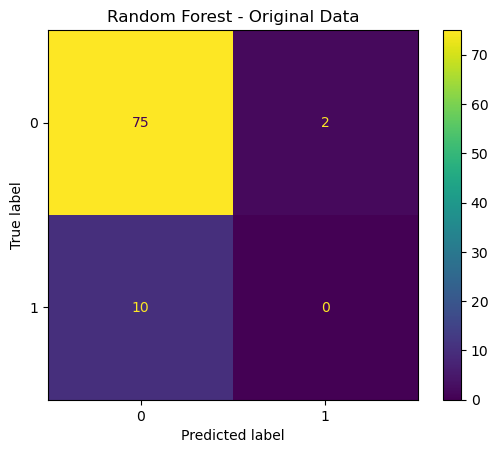

In [29]:
# Random Forest
forest =  RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)

# Predict on the test set
y_pred_forest = forest.predict(X_test)

# Print classification report
print("Random Forest on Original Data")
print(classification_report(y_test, y_pred_forest))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_forest)
ConfusionMatrixDisplay(cm).plot()
plt.title("Random Forest - Original Data")
plt.show()

### Logistic regression, Decision tree and random forest for over sampled minority class of the target variable.

#### Logistic regression with oversampling

Logistic Regression on Oversampled Data
              precision    recall  f1-score   support

           0       0.89      0.70      0.78        77
           1       0.12      0.30      0.17        10

    accuracy                           0.66        87
   macro avg       0.50      0.50      0.47        87
weighted avg       0.80      0.66      0.71        87



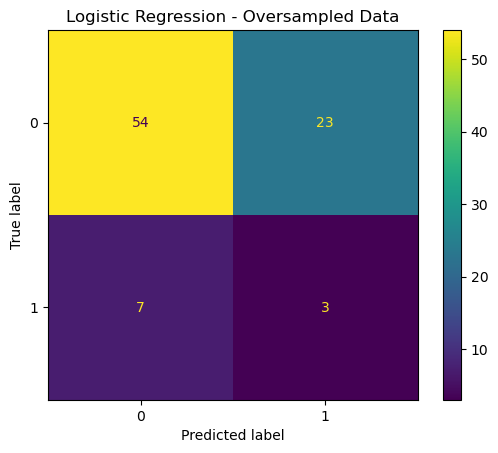

In [30]:
# Apply SMOTE to oversample the minority class
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# Train the logistic regression model on the oversampled data
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_logreg = logreg.predict(X_test)

# Print classification report
print("Logistic Regression on Oversampled Data")
print(classification_report(y_test, y_pred_logreg))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_logreg)
ConfusionMatrixDisplay(cm).plot()
plt.title("Logistic Regression - Oversampled Data")
plt.show()

#### Decision tree with oversampling

Decision Tree on Oversampled Data
              precision    recall  f1-score   support

           0       0.88      0.78      0.83        77
           1       0.11      0.20      0.14        10

    accuracy                           0.71        87
   macro avg       0.49      0.49      0.48        87
weighted avg       0.79      0.71      0.75        87



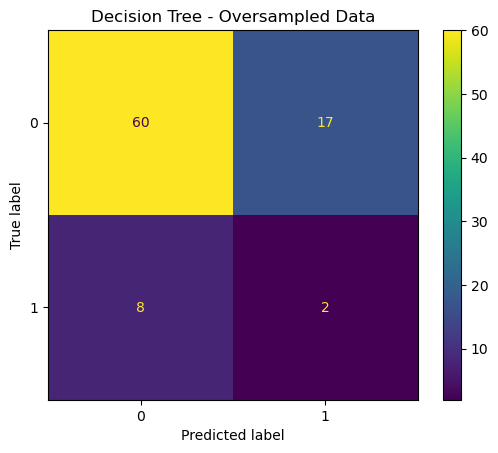

In [31]:
# Train the decision tree model on the oversampled data
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_tree = tree.predict(X_test)

# Print classification report
print("Decision Tree on Oversampled Data")
print(classification_report(y_test, y_pred_tree))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_tree)
ConfusionMatrixDisplay(cm).plot()
plt.title("Decision Tree - Oversampled Data")
plt.show()

#### Random forest with oversampling

Random Forest on Oversampled Data
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        77
           1       0.08      0.10      0.09        10

    accuracy                           0.77        87
   macro avg       0.48      0.48      0.48        87
weighted avg       0.79      0.77      0.78        87



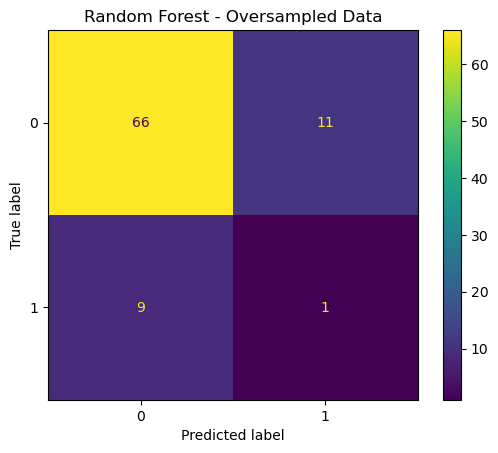

In [32]:
# Train the random forest model on the oversampled data
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_forest = forest.predict(X_test)

# Print classification report
print("Random Forest on Oversampled Data")
print(classification_report(y_test, y_pred_forest))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_forest)
ConfusionMatrixDisplay(cm).plot()
plt.title("Random Forest - Oversampled Data")
plt.show()

### Logistic regression, Decision tree and random forest for undersampled majority class of the target variable.

#### logistic regression with undersampling

Logistic Regression on Undersampled Data
              precision    recall  f1-score   support

           0       0.96      0.60      0.74        77
           1       0.21      0.80      0.33        10

    accuracy                           0.62        87
   macro avg       0.58      0.70      0.53        87
weighted avg       0.87      0.62      0.69        87



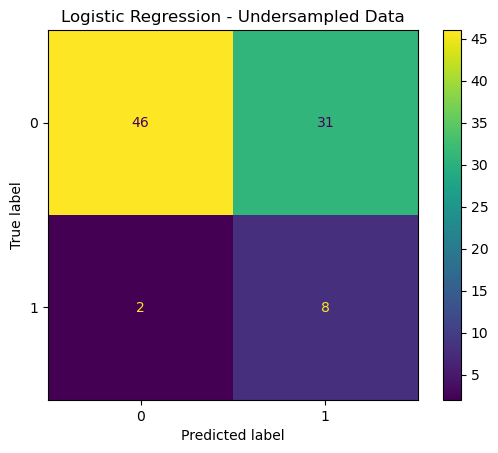

In [33]:
# Apply RandomUnderSampler to undersample the majority class
us = RandomUnderSampler( random_state=42)
X_train_under, y_train_under = us.fit_resample(X_train, y_train)

# Train the logistic regression model on the undersampled data
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_under, y_train_under)

# Predict on the test set
y_pred_logreg = logreg.predict(X_test)

# Print classification report
print("Logistic Regression on Undersampled Data")
print(classification_report(y_test, y_pred_logreg))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_logreg)
ConfusionMatrixDisplay(cm).plot()
plt.title("Logistic Regression - Undersampled Data")
plt.show()

#### Decision tree with undersampling

Decision Tree on undersampled Data
              precision    recall  f1-score   support

           0       1.00      0.47      0.64        77
           1       0.20      1.00      0.33        10

    accuracy                           0.53        87
   macro avg       0.60      0.73      0.48        87
weighted avg       0.91      0.53      0.60        87



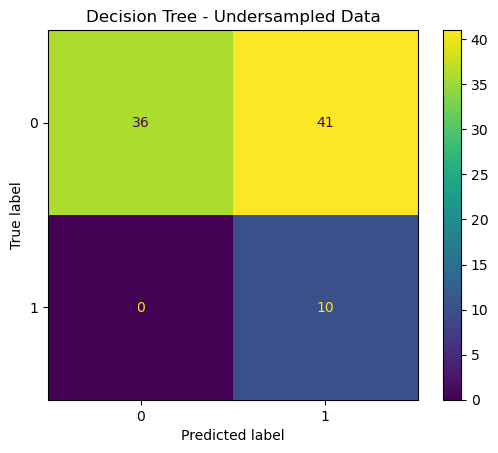

In [34]:
# Train the decision tree model on the undersampled data
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train_under, y_train_under)

# Predict on the test set
y_pred_tree = tree.predict(X_test)

# Print classification report
print("Decision Tree on undersampled Data")
print(classification_report(y_test, y_pred_tree))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_tree)
ConfusionMatrixDisplay(cm).plot()
plt.title("Decision Tree - Undersampled Data")
plt.show()

#### Random forest with undersampling

Random Forest on Undersampled Data
              precision    recall  f1-score   support

           0       0.98      0.56      0.71        77
           1       0.21      0.90      0.34        10

    accuracy                           0.60        87
   macro avg       0.59      0.73      0.53        87
weighted avg       0.89      0.60      0.67        87



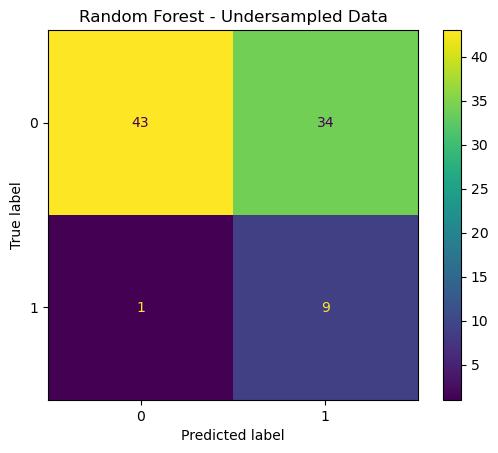

In [35]:
# Train the random forest model on the undersampled data
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train_under, y_train_under)

# Predict on the test set
y_pred_forest = forest.predict(X_test)

# Print classification report
print("Random Forest on Undersampled Data")
print(classification_report(y_test, y_pred_forest))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_forest)
ConfusionMatrixDisplay(cm).plot()
plt.title("Random Forest - Undersampled Data")
plt.show()

### AREA UNDER THE ROC

ROC-AUC Score: 0.6649


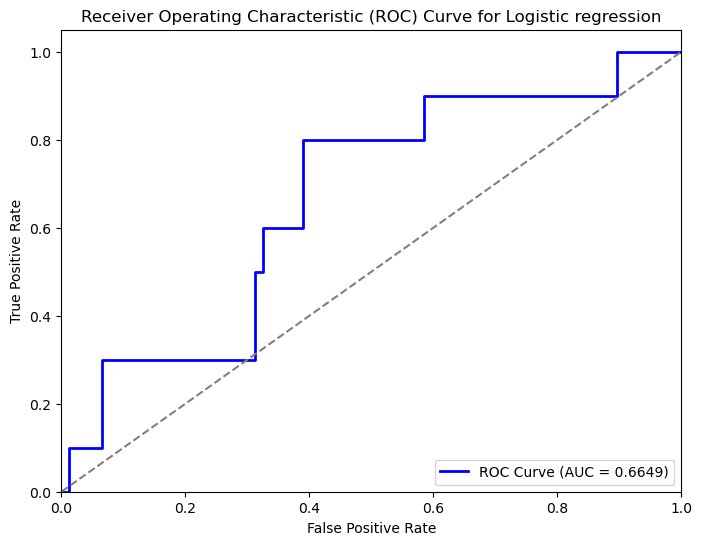

In [36]:
# Predict probabilities on the test set
# Train the logistic regression model on the undersampled data
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_under, y_train_under)



y_proba_logreg = logreg.predict_proba(X_test)[:, 1]  # Probability of class 1

# Compute ROC curve and ROC-AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_proba_logreg)
roc_auc = roc_auc_score(y_test, y_proba_logreg)

# Print ROC-AUC score
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic regression')
plt.legend(loc="lower right")
plt.show()



ROC-AUC Score: 0.7338


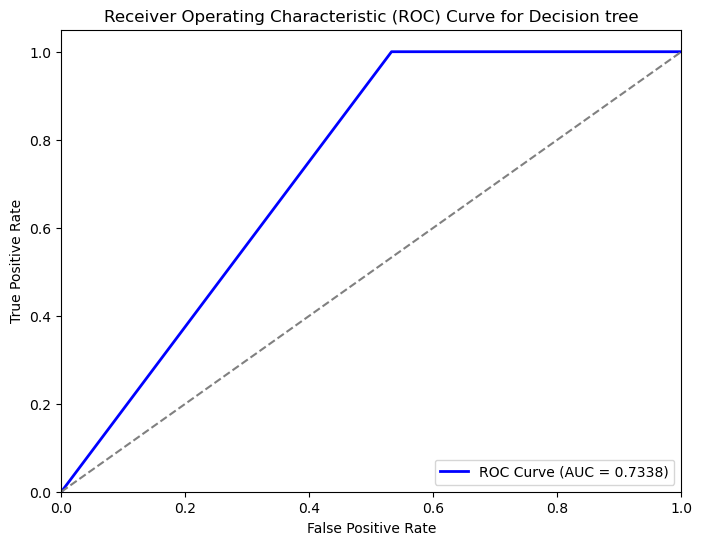

In [37]:
# Predict probabilities on the test set
# Train the decsion tree model on the undersampled data
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train_under, y_train_under)



y_proba_tree = tree.predict_proba(X_test)[:, 1]  # Probability of class 1

# Compute ROC curve and ROC-AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_proba_tree)
roc_auc = roc_auc_score(y_test, y_proba_tree)

# Print ROC-AUC score
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision tree')
plt.legend(loc="lower right")
plt.show()


ROC-AUC Score: 0.7649


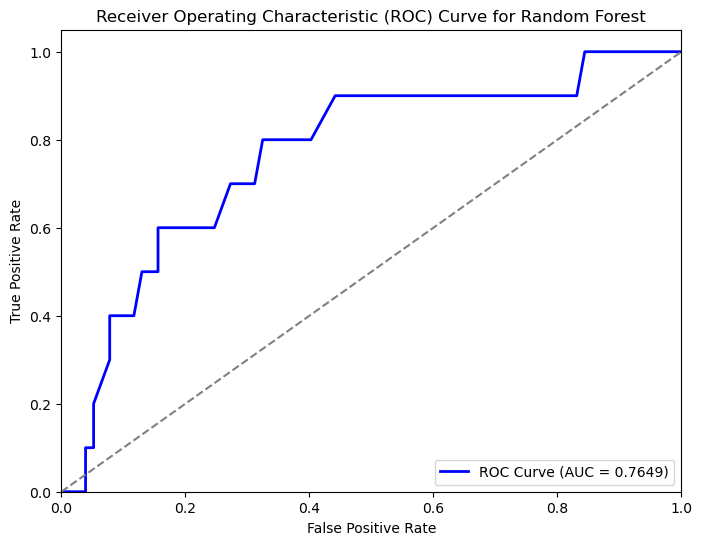

In [38]:
# Predict probabilities on the test set
# Train the random forest model on the undersampled data
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train_under, y_train_under)



y_proba_forest = forest.predict_proba(X_test)[:, 1]  # Probability of class 1

# Compute ROC curve and ROC-AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_proba_forest)
roc_auc = roc_auc_score(y_test, y_proba_forest)

# Print ROC-AUC score
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()


## Feature Importance

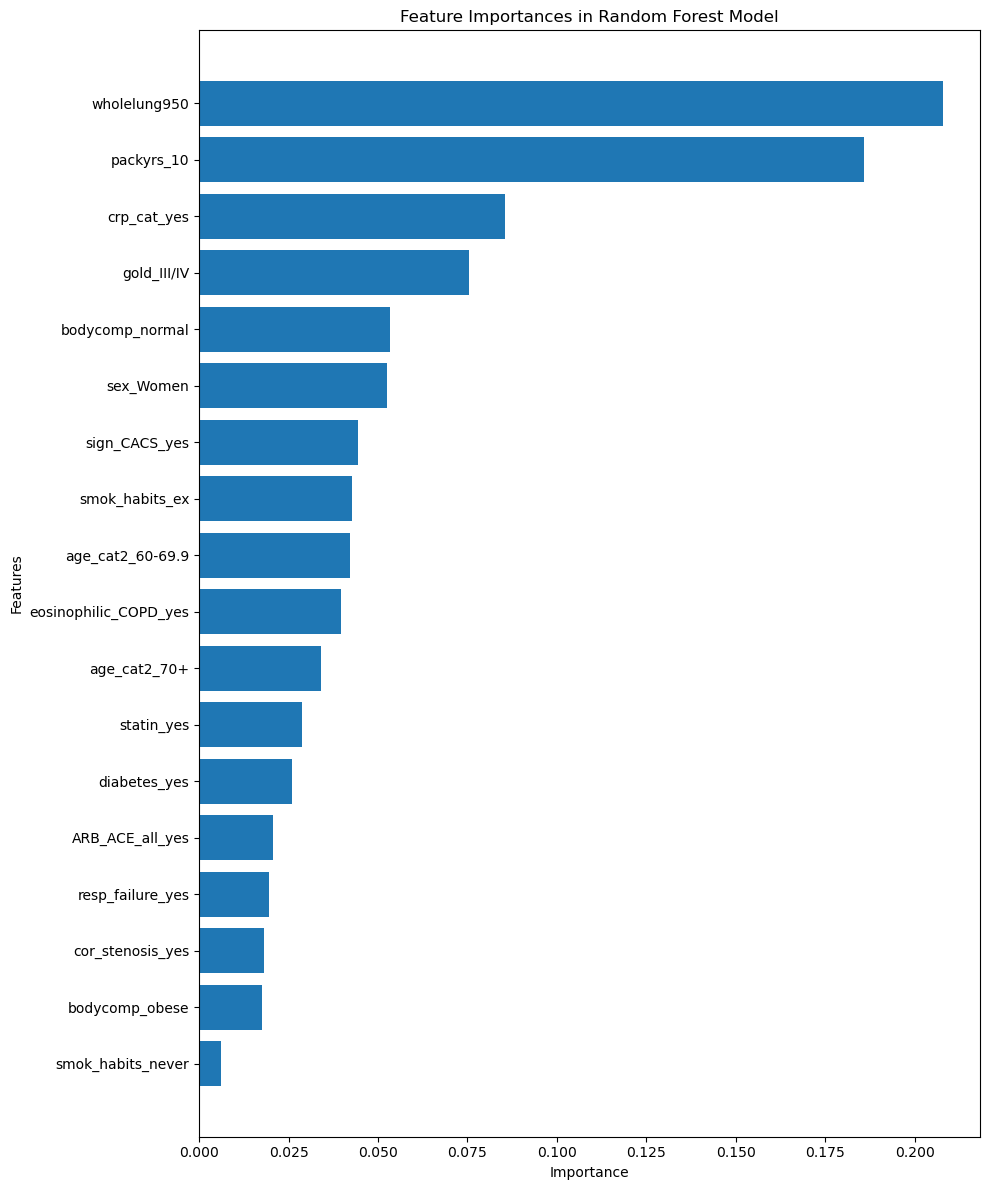

Top 5 most important features:
            feature  importance
17     wholelung950    0.207880
16       packyrs_10    0.185881
15      crp_cat_yes    0.085540
14      gold_III/IV    0.075388
13  bodycomp_normal    0.053242


In [39]:

# Get feature importances
importances = forest.feature_importances_
feature_names = X_train_under.columns 

# Sort features by importance
indices = np.argsort(importances)

# Create a DataFrame for easier handling
feature_importance_df = pd.DataFrame({
    'feature': feature_names[indices],
    'importance': importances[indices]
})

# Plot
plt.figure(figsize=(10, 12))  # Adjusted figure size for better visibility
plt.title("Feature Importances in Random Forest Model")
plt.barh(range(len(importances)), feature_importance_df['importance'])
plt.yticks(range(len(importances)), feature_importance_df['feature'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# Print top 10 features
print("Top 5 most important features:")
print(feature_importance_df.iloc[::-1].head(5))  # Reverse order to show most important first


# Hyperprameter Tuning for the logistic regrssion , decision tree and random forest models using the undersampled dataset

In [40]:
from sklearn.model_selection import GridSearchCV

### Hyper parameter tuning Logistic regression


In [41]:
# Define the parameter grid for Logistic Regression
param_grid_lr = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'max_iter': [100, 200, 300, 400, 500]
}

# Initialize the LogisticRegression
logreg = LogisticRegression(random_state=42)

# Initialize GridSearchCV with the LogisticRegression and parameter grid
grid_search_lr = GridSearchCV(estimator=logreg, param_grid=param_grid_lr, scoring='recall', 
                           cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the undersampled training data
grid_search_lr.fit(X_train_under, y_train_under)

# print best estimators and best hyperparameters
print("Best parameters found: ", grid_search_lr.best_params_)
print("Best estimator score: ", grid_search_lr.best_score_)


Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Best parameters found:  {'C': 0.01, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Best estimator score:  1.0


Logistic Regression on Undersampled Data with Hyperparameter Tuning
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        77
           1       0.11      1.00      0.21        10

    accuracy                           0.11        87
   macro avg       0.06      0.50      0.10        87
weighted avg       0.01      0.11      0.02        87



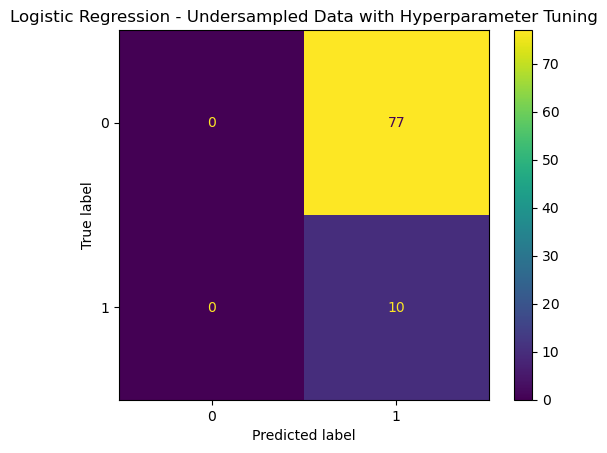

In [42]:
# Get the best estimator from the grid search
best_logreg_model = grid_search_lr.best_estimator_

# Predict on the test set
y_pred_logreg_val = best_logreg_model.predict(X_test)

# Print classification report
print("Logistic Regression on Undersampled Data with Hyperparameter Tuning")
print(classification_report(y_test, y_pred_logreg_val))

# Plot confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_logreg_val)
ConfusionMatrixDisplay(cm_lr).plot()
plt.title("Logistic Regression - Undersampled Data with Hyperparameter Tuning")
plt.show()

### Hyper parameter tuning Decision tree

In [43]:

# Define the parameter grid for Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6]
}

# Initialize the DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV with the DecisionTreeClassifier and parameter grid
grid_search_dt = GridSearchCV(estimator=tree, param_grid=param_grid_dt, scoring='recall', 
                           cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the undersampled training data
grid_search_dt.fit(X_train_under, y_train_under)

# print best estimators and best hyperparameters
print("Best parameters found: ", grid_search_dt.best_params_)
print("Best estimator score: ", grid_search_dt.best_score_)


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'}
Best estimator score:  0.6321428571428571


Decision Tree on Undersampled Data with Hyperparameter Tuning
              precision    recall  f1-score   support

           0       0.96      0.68      0.79        77
           1       0.24      0.80      0.37        10

    accuracy                           0.69        87
   macro avg       0.60      0.74      0.58        87
weighted avg       0.88      0.69      0.75        87



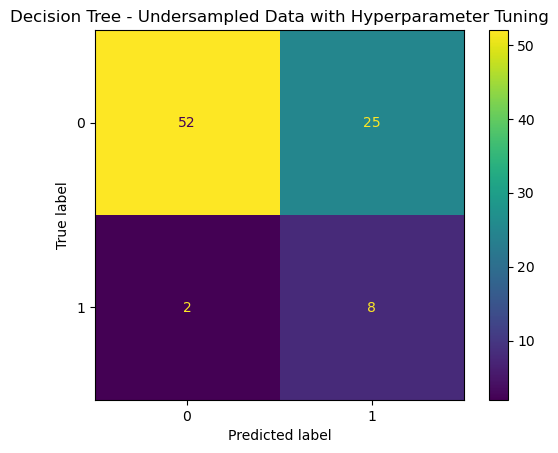

In [44]:
# Get the best estimator from the grid search
best_tree_model = grid_search_dt.best_estimator_

# Predict on the test set
y_pred_tree_val = best_tree_model.predict(X_test)

# Print classification report
print("Decision Tree on Undersampled Data with Hyperparameter Tuning")
print(classification_report(y_test, y_pred_tree_val))

# Plot confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_tree_val)
ConfusionMatrixDisplay(cm_dt).plot()
plt.title("Decision Tree - Undersampled Data with Hyperparameter Tuning")
plt.show()

### Hyper parameter tunning random forest

In [45]:

# Initialize the RandomForestClassifier
forest = RandomForestClassifier(random_state=42)

#Grid Search for Hyperparameter Tuning
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 3, 4, 5, 6],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6],
    'bootstrap': [True, False]
}

grid_search_rf = GridSearchCV(estimator=forest, param_grid=param_grid_rf, scoring='recall', cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train_under, y_train_under)

print("Best parameters found: ", grid_search_rf.best_params_)
print("Best estimator score: ", grid_search_rf.best_score_)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
Best parameters found:  {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best estimator score:  0.6321428571428571


Random Forest on Undersampled Data with Hyperparameter Tuning
              precision    recall  f1-score   support

           0       0.96      0.56      0.70        77
           1       0.19      0.80      0.31        10

    accuracy                           0.59        87
   macro avg       0.57      0.68      0.51        87
weighted avg       0.87      0.59      0.66        87



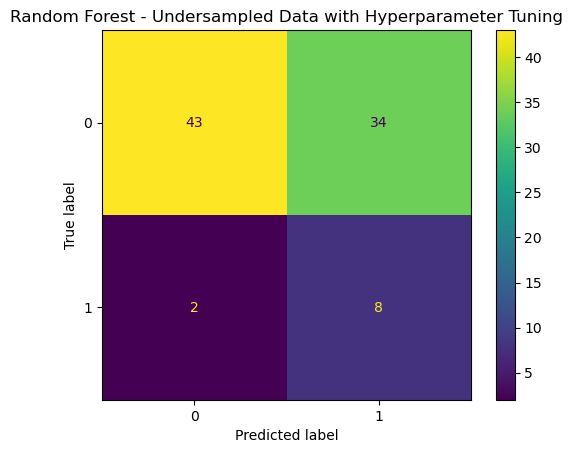

In [46]:
# Get the best estimator from the grid search
rf_best_model = grid_search_rf.best_estimator_

# Predict on the test set
y_pred_forest_val = rf_best_model.predict(X_test)

# Print classification report
print("Random Forest on Undersampled Data with Hyperparameter Tuning")
print(classification_report(y_test, y_pred_forest_val))

# Plot confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_forest_val)
ConfusionMatrixDisplay(cm_rf).plot()
plt.title("Random Forest - Undersampled Data with Hyperparameter Tuning")
plt.show()

## Insights from the analysis

* In this analysis, we considered recall (sensitivity) and the Area Under the Receiver Operating Characteristic Curve (AUC-ROC) as the most important metrics in the predictive analysis of identifying COPD patients more prone to exacerbation.

* The random forest model with the undersampled data generalized better on the test set. This is evident from the classification report, confusion matrix, and Area Under the Receiver Operating Characteristic Curve.

* Hyperparameter tuning did not improve the performance of the model.

* The recall on the test set for the positive class of COPD exacerbation in the random forest model was 90%, compared to 100% for the decision tree and 80% for the logistic regression models.

* This means that the random forest, decision tree, and logistic regression models were able to identify 90%, 100%, and 80% of COPD patients susceptible to exacerbation, respectively.

* The Area Under the Receiver Operating Characteristic Curve values for the random forest, decision tree, and logistic regression were 76%, 73%, and 66%, respectively.

* This means that there is a 76%, 73%, and 66% probability that the models will correctly distinguish between COPD patients susceptible to exacerbation and those not susceptible to exacerbation.

* Based on our analysis and our data, the top 5 most important features for predicting COPD exacerbation susceptibility are identified as follows:

  * wholelung950 ("Percentage of lung area density < 950 Hounsfield units" )
  * packyrs_10   ( "pack years of smoking")
  * crp_cat_yes  ( "High C-reactive protein")
  * gold_III/IV  ( "Severe and veru severe COPD status")
  * bodycomp_normal ( Body Composition)

    

* These features have been determined to significantly contribute to the prediction of COPD exacerbation susceptibility. Further exploration of these factors could provide deeper insights into the mechanisms underlying exacerbation risk in COPD patients.



